# Extract stratigraphy

We will now look at the recorded stratigraphy. The stratigraphic layer are recorded in `gospl` as `HDF5` files stored in the output folder as `stratal.XX.pX.h5` where XX is the output step and X the processor number.

:::{admonition} Stratal record definition
:class: note

The following information are stored:

+ elevation at time of deposition, considered to be to the current elevation for the top stratigraphic layer `stratZ`.
+ thickness of each stratigrapic layer `stratH` accounting for both erosion & deposition events.
+ proportion of fine sediment `stratF` contains in each stratigraphic layer.
+ porosity of coarse sediment `phiS` in each stratigraphic layer computed at center of each layer.
+ porosity of fine sediment `phiF` in each stratigraphic layer computed at center of each layer.

:::

In [1]:
import numpy as np
import pyvista as pv
from script import stratal as strat

import matplotlib
from matplotlib import cm
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable

label_size = 7
matplotlib.rcParams['xtick.labelsize'] = label_size
matplotlib.rcParams['ytick.labelsize'] = label_size
matplotlib.rc('font', size=6)

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

We will use the `stratal.py` function to extract the information above. It requires the following arguments: 

1. path: the path to the input file 
2. filename: the name of the input file 
3. layer: the stratal file you wish to output

In [3]:
# Load the function and specify the input file
strati = strat.stratal(path='./', filename='inputSedLay.yml')

# Read the stratigraphic dataset
strati.readStratalData()

# Interpolate the spherical dataset on a lon/lat regular grid
# by specifying the desired resolution and interpolation neighbours
strati.buildLonLatMesh(res=0.1, nghb=3)

Created sedimentary layers: 6
Total number of sedimentary layers: 8
Start building regular stratigraphic arrays
Percentage of arrays built : [####################] 100.0% DONE


We can visualise the created maps directly by doing…

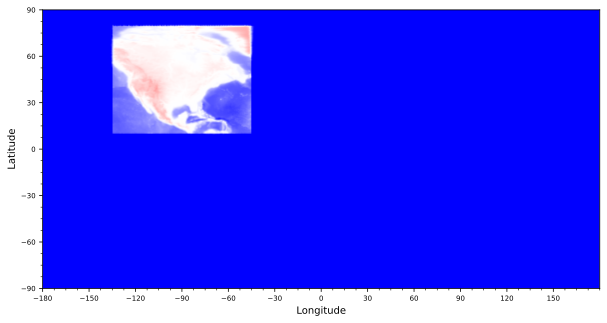

In [4]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

ax.imshow(np.flipud(strati.zi[-1,:,:]), extent=(-180, 180, -90, 90), vmin=-8000, vmax=8000, cmap=cm.bwr)
ax.set(xlabel='Longitude', ylabel='Latitude', yticks=np.arange(-90,120,30), xticks=np.arange(-180,180,30))
ax.minorticks_on()

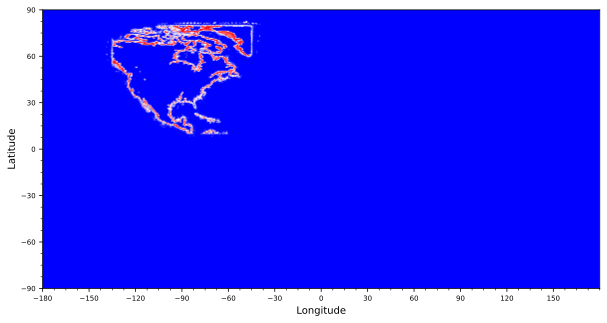

In [5]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

ax.imshow(np.flipud(strati.coarsei[-1,:,:]), extent=(-180, 180, -90, 90), vmin=0, vmax=1, cmap=cm.bwr)
ax.set(xlabel='Longitude', ylabel='Latitude', yticks=np.arange(-90,120,30), xticks=np.arange(-180,180,30))
ax.minorticks_on()

We will now extract the stratigraphic layer for a specific region by using the `writeMesh`:



:::{admonition} Function arguments
:class: note

+ `vtkfile` the output name of the `VTK` stratigraphic mesh to create
+ `lats` latitude of the lower left and upper right corner of the region (specified between -90 and 90 degree)
+ `lons` longitude of the lower left and upper right corner of the region (specified between -180 and 180 degree)
+ `sigma` the standard deviation for Gaussian kernel as defined in SciPy `gaussian_filter` [function](https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.gaussian_filter.html).

:::

The function returns the domain length in meters along the X and Y borders.



```{warning} 
This function may take several minutes to complete.
```

In [6]:
length = strati.writeMesh(vtkfile='sedlay',
                          lats=[22,31],
                          lons=[-100,-92],
                          sigma=0.5)

The function will build a `VTK` structured mesh containing the stratigraphic record for the region.

Here we will set the slice at the center of the domain…

We can visualise the stratigraphic layers in the notebook:

In [11]:
mesh = pv.read('sedlay.vts')
mesh.set_active_scalars('layID')
threshold = mesh.threshold([3,8])

# Position cross-section at the center of the region
slices = threshold.slice_orthogonal(x=length[0]/2, y=length[-1]/2, z=-10)

scale_factor = 80
slices[0].points[:, -1] *= scale_factor
slices[1].points[:, -1] *= scale_factor

contours0 = slices[0].contour(np.linspace(0, 7, 8))
contours1 = slices[1].contour(np.linspace(0, 7, 8))

p = pv.PlotterITK()
p.add_mesh(slices[0], scalars="dep elev")
p.add_mesh(slices[1], scalars="dep elev")
p.add_mesh(contours0, color="black", opacity=1.)
p.add_mesh(contours1, color="black", opacity=1.)

p.show()

Viewer(geometries=[{'vtkClass': 'vtkPolyData', 'points': {'vtkClass': 'vtkPoints', 'name': '_points', 'numberO…

Viewer(geometries=[{'vtkClass': 'vtkPolyData', 'points': {'vtkClass': 'vtkPoints', 'name': '_points', 'numberO…